#  Workflow de trabajo


Este dataset es un preprocesamiento completo para guiarte en cómo armar tu trabajo final, tomar decisiones respecto a cómo transformar variables y encontrarle significado

Descargar el dataset `houses.csv` [link](https://drive.google.com/file/d/1-cK-D6pK1koUXP6NzlyWWJgKA9JVTN3l/view?usp=share_link) en google drive


Corre el código para leer el dataset y seleccionar las columnas

In [6]:
import pandas as pd

# Loading the dataset
path = "house.csv"
df = pd.read_csv(path)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr', 
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']


df = df[selected_features].copy()


df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


Tomate el tiempo para leer el txt que explica las variables. Esta en el folder que contiene este notebook

In [7]:
!head workflow_house.txt

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES


## 1- Duplicados

Los duplicados causan que haya datos de train en test y queremos evitar overfitting

### ¿Cuantos duplicados hay en el dataset?

Crear la variable cantidad_duplicados para mostrarlo

In [8]:
# COMPLETAR Longitud df original menos longitud df sin duplicados
cantidad_duplicados

300

Remover duplicados y sobre escribi el

In [9]:
# borrar duplicados y asignar al df

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


## 2- Faltantes

Imprimir el porcentaje de variables por columna

GarageFinish    0.06
RoofSurface     0.01
GrLivArea       0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
OverallCond     0.00
CentralAir      0.00
ChimneyStyle    0.00
MoSold          0.00
SalePrice       0.00
dtype: float64

### `GarageFinish`

 **Investigación sobre**  `GarageFinish`

¿Que significan los faltantes en `GarageFinish`?
 Elegí :

1. Eliminar todos los faltantes
2. imputar la mediana usando `SimpleImputer` de Scikit-Learn
3. Dejar nulos y reemplazarlos por algún otro valor significativo

Los cambios asignarlos al `df`.


In [11]:
import numpy as np

### `RoofSurface`

**Investigación sobre** `RoofSurface`

¿Que significan los faltantes en `RoofSurface`?

1. Eliminar todos los faltantes
2. imputar la mediana usando `SimpleImputer` de Scikit-Learn
3. Dejar nulos y reemplazarlos por algún otro valor significativo

Los cambios asignarlos al `df`.


In [12]:
#`RoofSurface` tiene pocos nulos, puedo imputar por mediana
from sklearn.impute import SimpleImputer

#INSTANCIA simpleImputer como imputer

#SimpleImputer(strategy="median")

#imputer.fit(df[[nombre de la columna]]) # fit la columna

#df['RoofSurface'] = imputer.transform(df[[nombre de la columna]]) #metodo transform a la columna seleccionada

### `ChimneyStyle`

¿Que significan los faltantes en `ChimneyStyle`?
Elegí :

1. Eliminar todos los faltantes
2. imputar la mediana usando `SimpleImputer` de Scikit-Learn
3. Dejar nulos y reemplazarlos por algún otro valor significativo

Los cambios asignarlos al `df`.


* No todos los nulos son representados cómo nulos `np.nans` pero Python's `isnull()` solo detecta los `np.nans`...


In [13]:
#es mejor a veces no hacer supuestos y vloar toda la columna

 #genera un conteo de valores

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [14]:
 # Replaza "?" por np.nan

In [15]:
# quer porcentaje de nulos hay?

0.9965753424657534

Una vez terminado no tenes más missings

In [17]:
#mostrar el porcentaje de nulo ahora

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## 3- Scalado

**Entendamos que significa escalar**

Armar una regresión lineal, con cross validation y predecir `SalePrice`

Fijarse que la regresión lineal sólo soporta variables númericas [DataFrame.select_dtypes](https://pandas.pydf.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# excluding all non-numeric columns and the target
X = df.select_dtypes(exclude='object').drop('SalePrice', axis=1)

y = df.SalePrice

#implementa cross_val_score(LinearRegression(), X, y, cv = 10) y hacele la media .mean()

0.577643398519208

Guarda este score para después

###  `RoofSurface` 

**Scalado** para `RoofSurface`

 Investigar `RoofSurface` su distribución y outliers y adoptar una tecnica:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replazar el dataframe por la elección

<AxesSubplot:ylabel='Frequency'>

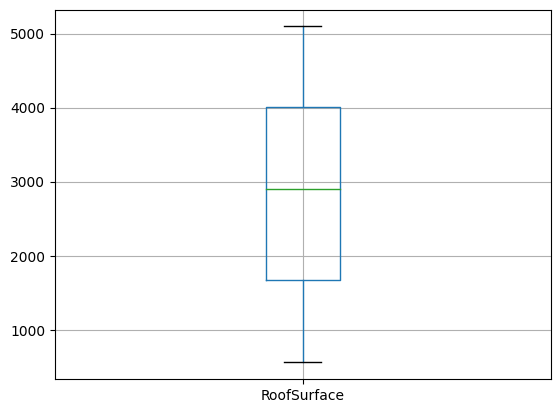

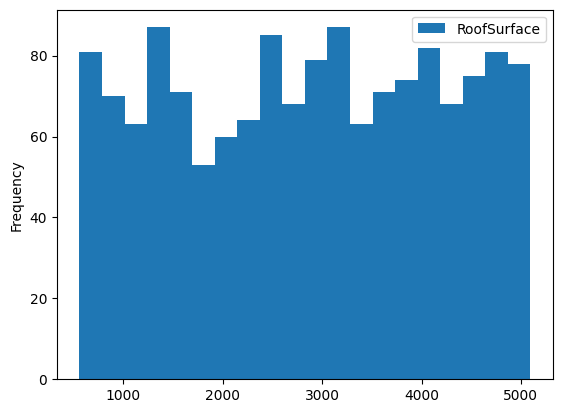

In [19]:
#.boxplot()de la columna del dataframe
#.plot.hist(bins=20) de la columna del dataframe

* Si no tiene una distribución normal es mejor hacer un MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# minmaxscaler = MinMaxScaler()

# reemplaza la columna original por   minmaxscaler.fit_transform(df[['RoofSurface']])

df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000


### `GrLivArea`

**Scalado** para `GrLivArea`

 Investigar `GrLivArea` su distribución y outliers y adoptar una tecnica:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replazar el dataframe por la elección

 `GrLivArea` tiene una distribución normal pero tiene outliers, mejor usar RobustScaler

In [22]:
from sklearn.preprocessing import RobustScaler

#implementar robust scaller a la columna
# #RobustScaler()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,1995.0,RFn,Y,2,208500
1,-0.312090,3,1,8,874.0,RFn,Y,5,181500
2,0.497489,3,1,5,1593.0,RFn,Y,9,223500
3,0.390885,3,1,5,2566.0,Unf,Y,2,140000
4,1.134029,4,1,5,3130.0,RFn,Y,12,250000


### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

**Scalado** para `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`

 Investigar `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`su distribución y outliers y adoptar una tecnica:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replazar el dataframe por la elección

`BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` son variables ordinales, mejor hacer MinMaxScaler


In [23]:
from sklearn.preprocessing import MinMaxScaler

#implementar min max escaler


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,1995.0,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,874.0,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,1593.0,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,2566.0,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,3130.0,RFn,Y,12,250000


## 4- Feature Encoding

### `GarageFinish`

Sobre `GarageFinish`

Investigar técnicas de encoding para `GarageFinish`
- Ordinal encoding
- One-Hot encoding

reemplazar el dataframe


`GarageFinish` es de multicategoría y necesitamos usar one-hhot

In [24]:
#mostrar categorias unicas

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

GarageFinish_ohe = OneHotEncoder(sparse=False)

# Fit one hot encoder

# GarageFinish_ohe.categories_ ver categorias

[array(['Fin', 'NoGarage', 'RFn', 'Unf'], dtype=object)]

In [26]:
df['Fin'],df['NoGarage'],df['RFn'],df['Unf']  = GarageFinish_ohe.fit_transform(df[['GarageFinish']]).T s

# Drop original column

df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,1995.0,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,874.0,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,1593.0,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,2566.0,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,3130.0,Y,12,250000,0.0,0.0,1.0,0.0


### Encoding  `CentralAir`

Sobre `CentralAir`

Investigar técnicas de encoding para `CentralAir`
- Ordinal encoding
- One-Hot encoding

reemplazar el dataframe




¿Que tipo de variable es?

In [ ]:
#ver valores unicos

array(['Y', 'N'], dtype=object)

In [ ]:
CentralAir_encoder = OneHotEncoder(sparse=False, drop='if_binary', categories=[['N', 'Y']]) # Instanciate encoder

df['CentralAir'] = CentralAir_encoder.fit_transform(df[['CentralAir']]) # Fit encoder and tranform

df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


## 5- Ingeniería de variables

### `MoSold` - Cyclical engineering 

Una característica puede ser numérica (continua o discreta), categórica u ordinal. Pero una característica también puede ser temporal (por ejemplo, trimestres, meses, días, minutos, ...).

Las características cíclicas como el tiempo necesitan un preprocesamiento específico. De hecho, si desea que cualquier algoritmo de Machine Learning capture esta ciclicidad, sus características cíclicas deben preprocesarse de cierta manera.

Consider the feature `MoSold`, Es el mes que fue vendido

In [27]:
df["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

* Se vendieron muchas casas en junio (6), julio (7) y mayo (5) (primavera/verano)
* Solo se vendieron algunas casas en diciembre (12), enero (1) y febrero (2) (~ Otoño/Invierno)
    * Pero para cualquier modelo de Machine Learning, no hay ninguna razón por la que diciembre (12) y enero (1) estén "cerca"...

## Leer!
Sobre variables ciclicas [TowardsDataScience](https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca)

* Sino funciona en el navegador abrirlo con incognito en chrome

### `MoSold`
- Crear dos nuevas características `sin_MoSold` y `cos_MoSold` que corresponden respectivamente al seno y coseno de MoSold.
- Dropea la columna original `MoSold`

El perímetro de un círculo si $C = 2 \pi r = 2 \pi$ suponiendo que $ r = 1$


In [28]:
months_in_a_year = 12

df['sin_MoSold'] = np.sin(2*np.pi*(df.MoSold-1)/months_in_a_year)
df['cos_MoSold'] = np.cos(2*np.pi*(df.MoSold-1)/months_in_a_year)
df.drop(columns=['MoSold'], inplace=True)

df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,1995.0,Y,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,874.0,Y,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,1593.0,Y,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,2566.0,Y,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,3130.0,Y,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


- El -1 no es obligatorio porque las funciones seno y coseno tienen una periodicidad de $ 2 \pi$
- Sin embargo, es más correcto incluirlo en términos de propiedades trigonométricas porque $cos(0) = 1$ y $sin(0) = 0$

## 6- Exporta el dataset procesado

In [ ]:
df.to_csv("data/clean_df.csv", index=False)

🏁 🚀 Ahora sí entendes el CRISPDM! ¿O no? 🤔